<a href="https://colab.research.google.com/github/NelluriLokesh/hrs_Marks/blob/main/Hrs_Marks_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Problem Statement

In  this data, we have one independent variable (Features) "Hours of Study" and one dependent variable (Target) "Marks". You have train a SVR model to understand the relationship between the Hours of Study and Marks of the student to predict the student's marks based on their number of hours dedicated to studies.

# Importing the dataset

In [ ]:
df = pd.read_csv(r"C:\Users\ABC\Desktop\data scientist\Machine L Projects\Predicting the Study of Hrs = Marks\Project FIle\raw.githubusercontent.com_mk-gurucharan_Regression_master_SampleData.csv")

# EDA

In [ ]:
df.head()

,Hours of Study,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [ ]:
df.tail()

,Hours of Study,Marks
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958
99,25.128485,53.454394


In [ ]:
df.describe()

,Hours of Study,Marks
count,100.000000,100.000000
mean,48.958341,72.035051
std,9.746379,15.200087
min,25.128485,31.707006
25%,41.526164,60.788586
50%,49.634970,72.179542
75%,56.762631,83.215080
max,70.346076,99.051415


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hours of Study  100 non-null    float64
 1   Marks           100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [ ]:
df.columns

Index(['Hours of Study', 'Marks'], dtype='object')

In [ ]:
# df.columns = ['Hours','Marks']
df.rename(columns={'Hours of Study':'Hours'}, inplace=True)

In [ ]:
df.isnull().sum()

Hours    0
Marks    0
dtype: int64

Text(0.5, 1.0, 'Hours of Study V/s Marks')

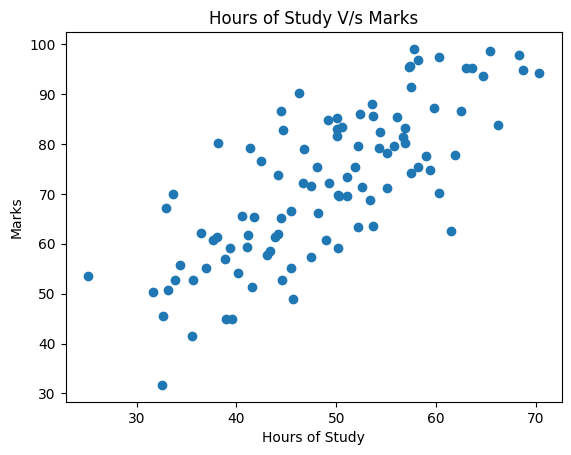

In [ ]:
plt.scatter(df.Hours, df.Marks)
plt.xlabel('Hours of Study')
plt.ylabel('Marks')
plt.title('Hours of Study V/s Marks')

<Axes: >

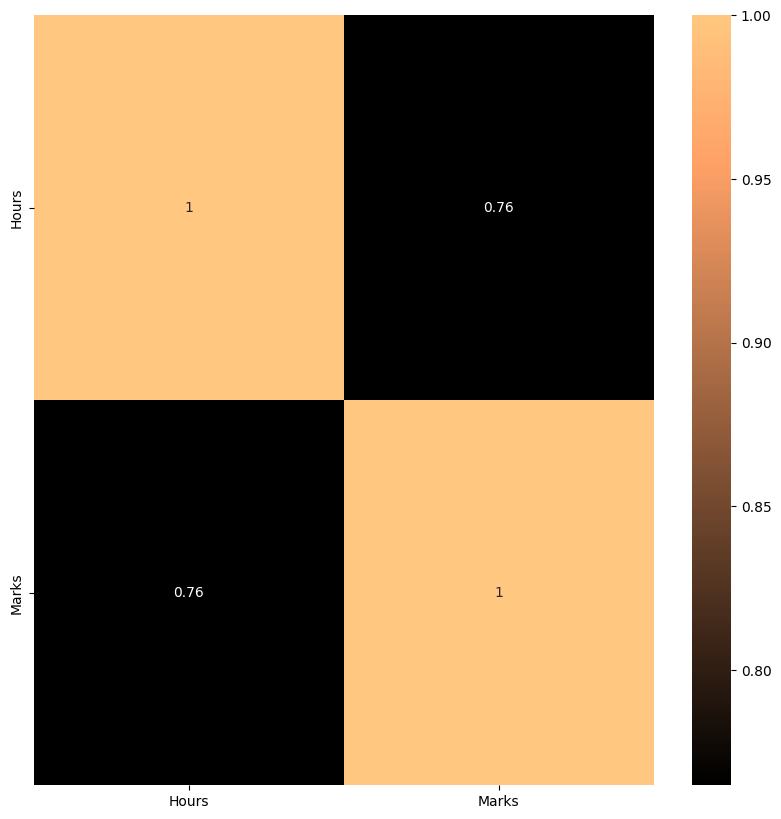

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True, cmap='copper')

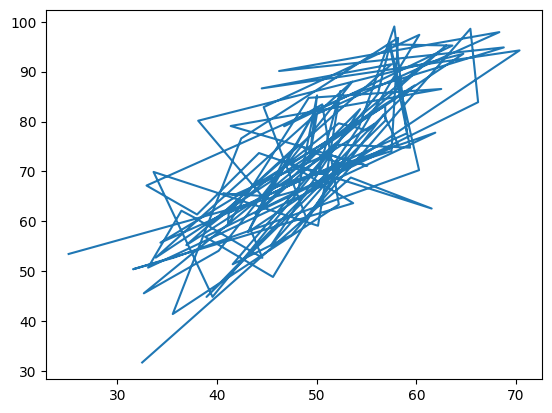

In [ ]:
plt.plot(df.Hours,df.Marks)

# Feature Scalling

* Standardization
* Normalisation

In [ ]:
df.head()

,Hours,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [ ]:
-1 to 1

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
stanscale = StandardScaler()

In [ ]:
X = stanscale.fit_transform(X.reshape(-1,1))
y = stanscale.fit_transform(y.reshape(-1,1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                    random_state=10)

In [ ]:
X_train.shape

(80, 1)

In [ ]:
from sklearn.svm import SVR

In [ ]:
model = SVR(kernel='rbf')

In [ ]:
model.fit(X_train,y_train)

c:\Users\ABC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([-0.76947139,  0.62495329, -0.36605346, -1.26283815,  0.57381597,
       -0.1185472 , -0.75664008, -0.40417142, -0.99623181,  0.95262628,
        1.07387222,  0.35030893, -0.56328734, -0.52093818,  0.07543078,
        1.22551728,  1.33758452,  0.67596748, -0.56967027, -0.64786557])

In [ ]:
y_test = stanscale.inverse_transform(y_test)

In [ ]:
y_test

array([[56.87721319],
       [81.43619216],
       [61.4247098 ],
       [50.71958891],
       [85.49806778],
       [71.54663223],
       [44.84712424],
       [58.56982472],
       [62.12457082],
       [70.25193442],
       [62.5623823 ],
       [68.77759598],
       [61.68403752],
       [65.28088692],
       [81.53699078],
       [94.25710159],
       [94.85387123],
       [95.45505292],
       [59.35885025],
       [54.0840548 ]])

Text(0.5, 1.0, 'Actual Marks V/s Predicted Marks')

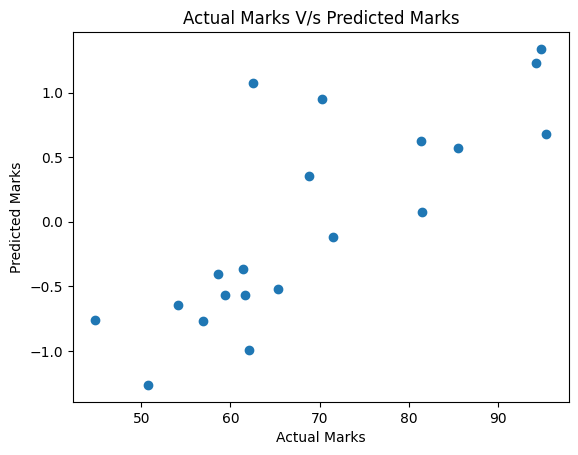

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Marks')
plt.ylabel('Predicted Marks')
plt.title('Actual Marks V/s Predicted Marks')

In [ ]:
print(model.predict([[5]]))

[-0.03507798]


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
model.score(X_test,y_test)

-22.099949752331796

In [ ]:
r2_score(y_test, y_pred)

-22.099949752331796

In [ ]:
  mean_squared_error(y_test, y_pred)

4967.007136956301

In [ ]:
mean_absolute_error(y_test, y_pred)

69.06161603455186